In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

#경고 무시
import warnings

In [35]:
regular = pd.read_csv("../Regular_Season_Batter.csv")

In [140]:
regular2 = pd.read_csv("../Regular_Season_Batter2.csv")

In [204]:
# AB가 10이상인 데이터가 신뢰성이 높기 때문에 AB가 10이상이 데이터만 반영
regular = regular.loc[regular["AB"]>100]

## 기존 포지션 변수에서 새로운 칼럼 생성
1. position1 : 내야수/외야수/지명타자/포수의 값을 가지는 칼럼
2. position2 : 좌타/우타/양타의 값을 가지는 칼럼

In [45]:
# 포지션 칼럼을 기준으로 내야수/외야수/지명타자/포수의 값을 가지는 or 좌타/우타/양타 
regular["position1"] = regular["position"].apply(lambda x: x.split("(")[0])
regular["position2"] = regular["position"].apply(lambda x: x.split("(")[1][2:4])

In [40]:
# 포지션 칼럼을 기준으로 내야수/외야수/지명타자/포수의 값을 가지는 or 좌타/우타/양타 
regular2["position1"] = regular2["position"].apply(lambda x: x.split("(")[0])
regular2["position2"] = regular2["position"].apply(lambda x: x.split("(")[1][2:4])

## 포지션, 좌타/우타/양타별 OPS분석

In [47]:
regular.groupby(["position1"])["OPS"].mean()

position1
내야수     0.655721
외야수     0.655471
지명타자    0.720068
포수      0.601554
Name: OPS, dtype: float64

In [42]:
regular2.groupby(["position1"])["OPS"].mean()

position1
내야수    0.658752
외야수    0.654136
포수     0.613197
Name: OPS, dtype: float64

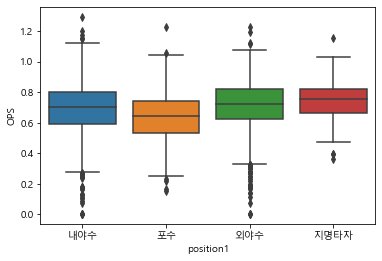

In [184]:
sns.boxplot(x="position1", y="OPS", data = regular)

position2
양타    0.580554
우타    0.691032
좌타    0.701140
Name: OPS, dtype: float64


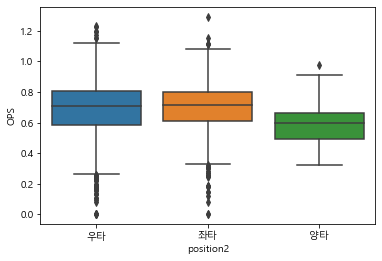

In [185]:
print(regular.groupby(["position2"])["OPS"].mean())

sns.boxplot(x="position2", y="OPS", data = regular)

## 각 칼럼별 분석

In [198]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'age', 'team', 'avg', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO',
       'GDP', 'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position',
       'career', 'starting_salary', 'OPS', 'position1', 'position2', '1B',
       '1b_luck', '2b_luck', '3b_luck'],
      dtype='object')

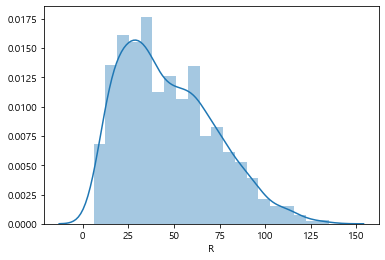

In [205]:
sns.distplot(regular["R"])

3B
0     0.637287
1     0.733786
2     0.763971
3     0.755265
4     0.748063
5     0.823657
6     0.827745
7     0.774181
8     0.780000
9     0.810834
10    0.781500
11    0.900549
12    0.783000
13    0.967000
17    0.985000
Name: OPS, dtype: float64


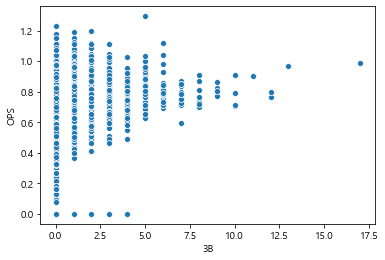

In [173]:
print(regular.groupby(["3B"])["OPS"].mean().sort_index())
#SB, CS, GDP, E
sns.scatterplot(x="3B", y="OPS",data=regular)

In [168]:
def cs_preprocessing(x):
    if x<=2:
        return 0
    elif x<=12:
        return 2
    elif x<=17:
        return 3
    else:
        return 1

In [171]:
pd.concat([regular["CS"].apply(cs_preprocessing),regular["OPS"]], axis=1).corr()

,CS,OPS
CS,1.00000,0.27115
OPS,0.27115,1.00000


### OPS와의 상관관계 분석
- agd, SB가 OPS와 상관관계가 가장 작음

In [142]:
regular['1B']=regular['H']-regular['2B']-regular['3B']-regular['HR']

regular['1b_luck']=regular['1B']/(regular['AB']-regular['HR']-regular['SO'])
regular['2b_luck']=regular['2B']/(regular['AB']-regular['HR']-regular['SO'])
regular['3b_luck']=regular['3B']/(regular['AB']-regular['HR']-regular['SO'])

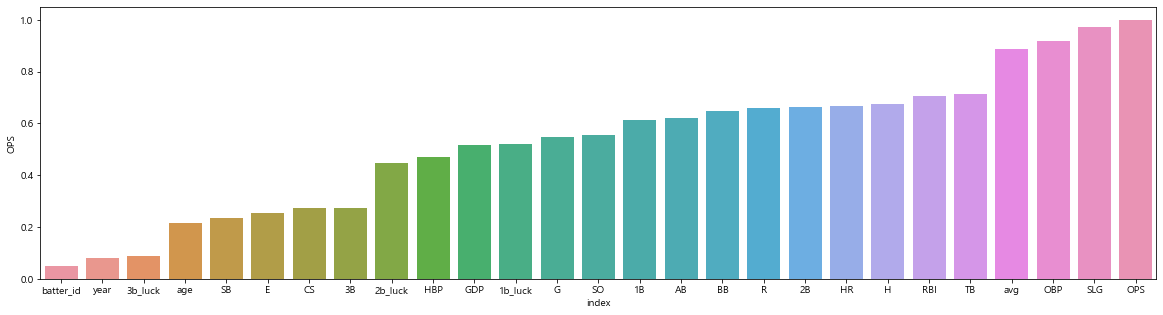

In [143]:
plt.figure(figsize=(20,5))
sns.barplot(x="index",y="OPS",data=regular.corr()["OPS"].abs().sort_values().reset_index())

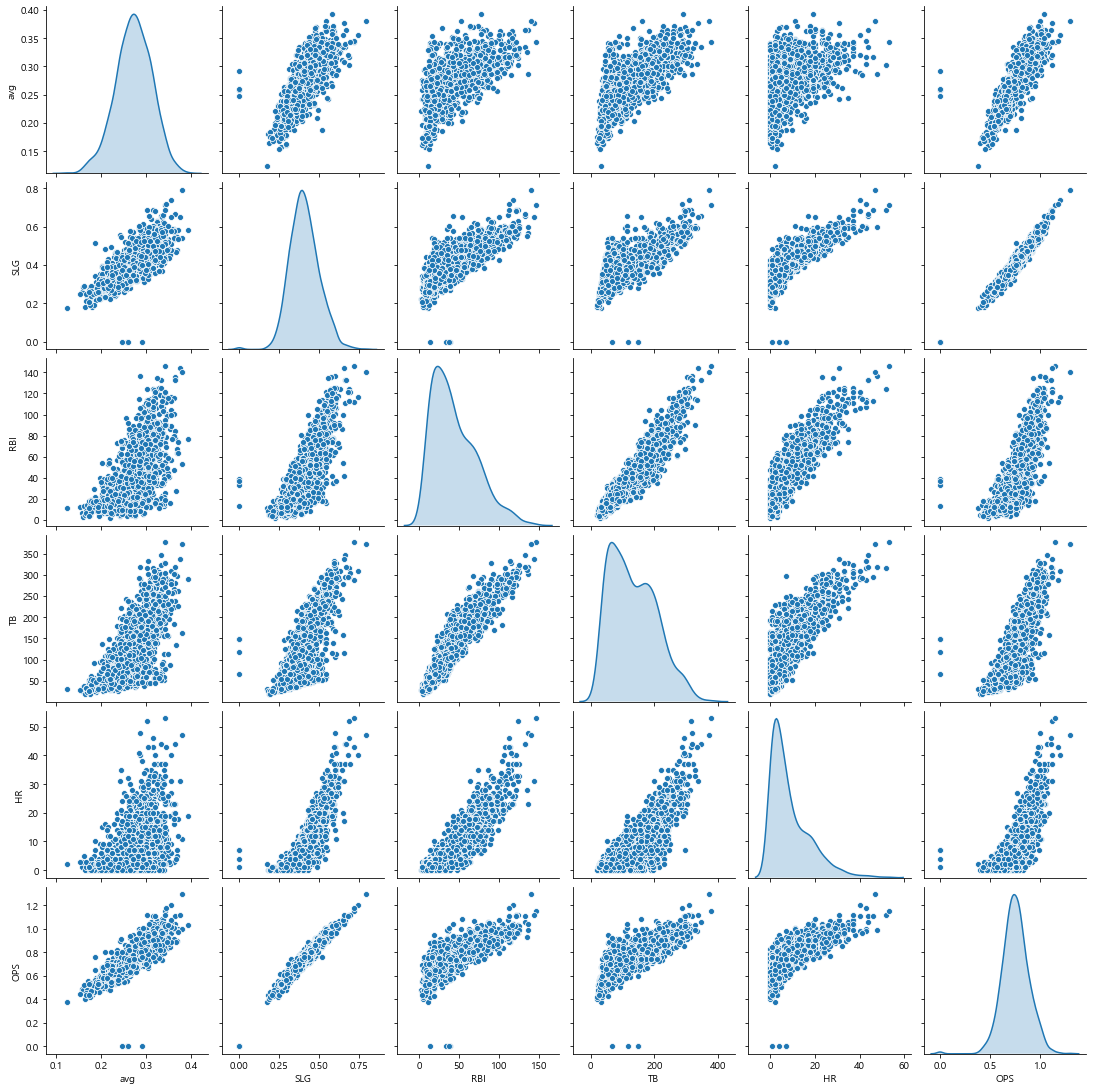

In [233]:
sns.pairplot(regular[["avg","SLG","RBI","TB","HR","OPS"]],diag_kind='kde')

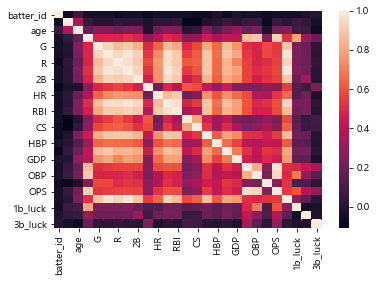

In [95]:
sns.heatmap(regular.corr())

In [182]:
regular.corr()["OPS"]

batter_id   -0.047689
year         0.081611
age          0.215307
avg          0.885851
G            0.549171
AB           0.619588
R            0.660673
H            0.674321
2B           0.661817
3B           0.274766
HR           0.667742
TB           0.713966
RBI          0.705395
SB           0.236548
CS           0.273621
BB           0.648582
HBP          0.468674
SO           0.554271
GDP          0.515390
SLG          0.971375
OBP          0.919705
E            0.254322
OPS          1.000000
1B           0.614891
1b_luck      0.522154
2b_luck      0.446588
3b_luck      0.088690
Name: OPS, dtype: float64

## 몸무게별 OPS

In [127]:
regular['height/weight']

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [164]:
weight = (regular['height/weight'].dropna()).apply(lambda x: int(x.split("/")[1][:-2]))

In [165]:
pd.concat([weight,regular["OPS"]],axis=1).corr()

,height/weight,OPS
height/weight,1.000000,0.277303
OPS,0.277303,1.000000


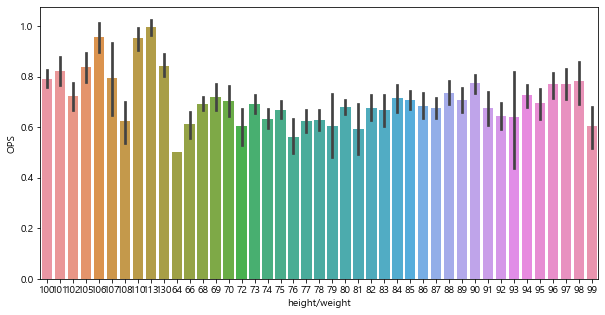

In [163]:
plt.figure(figsize = (10,5))
sns.barplot(x=weight, y=regular["OPS"])